<a href="https://colab.research.google.com/github/Arjun650/MachineLearning/blob/main/lab_02Revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [3]:
data = pd.read_csv('/content/drive/MyDrive/team01.csv')
print(data.head(10))


  Timestamp     Speaker                               Transcript      Label
0  00:00:02   Speaker 1                                Yes, Sir.  Statement
1  00:00:05   Speaker 1                                     And.  Statement
2  00:00:07   Speaker 1             Then we go to with that, OK.  Statement
3  00:00:10   Speaker 1                                 OK, Sir.  Statement
4  00:00:11   Speaker 1                                    Yeah.  Statement
5  00:00:13   Speaker 1           Itself is all new to yourself.  Statement
6  00:00:19   Speaker 2                                      OK   Statement
7  01:00:19   Speaker 1                                       OK  Statement
8  00:00:23   Speaker 2  Can you tell me name of one classifier?   Question
9  00:00:27   Speaker 3           Which is non linear in nature.   Question


In [5]:
data.columns

Index(['Timestamp', 'Speaker', 'Transcript', 'Label'], dtype='object')

In [11]:
vectorizer = TfidfVectorizer() # Initialize TF-IDF Vectorizer

X = vectorizer.fit_transform(data['Transcript']) # Fit and transform the

data_array = X.toarray() # Convert the result into an array

feature_names = vectorizer.get_feature_names_out() # Get the feature names (words)

df = pd.DataFrame(data_array, columns=feature_names)
print(df)

    able  actual  actually  all   an       and       are  baidu  beaches  \
0    0.0     0.0  0.000000  0.0  0.0  0.000000  0.000000    0.0      0.0   
1    0.0     0.0  0.000000  0.0  0.0  1.000000  0.000000    0.0      0.0   
2    0.0     0.0  0.000000  0.0  0.0  0.000000  0.000000    0.0      0.0   
3    0.0     0.0  0.000000  0.0  0.0  0.000000  0.000000    0.0      0.0   
4    0.0     0.0  0.000000  0.0  0.0  0.000000  0.000000    0.0      0.0   
..   ...     ...       ...  ...  ...       ...       ...    ...      ...   
60   0.0     0.0  0.000000  0.0  0.0  0.000000  0.346022    0.0      0.0   
61   0.0     0.0  0.000000  0.0  0.0  0.249307  0.000000    0.0      0.0   
62   0.0     0.0  0.000000  0.0  0.0  0.000000  0.000000    0.0      0.0   
63   0.0     0.0  0.384093  0.0  0.0  0.000000  0.000000    0.0      0.0   
64   0.0     0.0  0.000000  0.0  0.0  0.000000  0.000000    0.0      0.0   

     because  ...      what  when     which  why      will      with  yeah  \
0   0.000

In [14]:
X_statements = data_array[data['Label'] == 'Statement']
X_questions = data_array[data['Label'] == 'Question']
X_answers = data_array[data['Label'] == 'Answer']

In [16]:
centroid_statements = np.mean(X_statements, axis=0)
centroid_questions = np.mean(X_questions, axis=0)
centroid_answers = np.mean(X_answers, axis=0)

In [18]:
std_statements = np.std(X_statements, axis=0)
std_questions = np.std(X_questions, axis=0)
std_answers = np.std(X_answers, axis=0)

print(f"Standard Deviation for Statements: {std_statements}")
print(f"Standard Deviation for Questions: {std_questions}")
print(f"Standard Deviation for Answers: {std_answers}")

Standard Deviation for Statements: [0.         0.         0.         0.08180835 0.         0.18246561
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.116881   0.         0.         0.
 0.14708501 0.         0.1200758  0.         0.         0.
 0.11394416 0.         0.1934358  0.         0.         0.
 0.12541445 0.         0.04775324 0.         0.08180835 0.
 0.07354251 0.         0.         0.         0.07861532 0.
 0.         0.12902267 0.         0.         0.09991959 0.
 0.         0.         0.         0.         0.         0.
 0.116881   0.08180835 0.16461347 0.         0.         0.
 0.         0.         0.18246561 0.4447958  0.         0.
 0.         0.         0.         0.         0.         0.
 0.13496418 0.         0.         0.         0.         0.
 0.         0.12902267 0.         0.         0.         0.27112046
 0.18246561 0.         0.         0.         0.         0.
 0.  

In [19]:
# Distance between Statements and Questions
distance_statements_questions = np.linalg.norm(centroid_statements - centroid_questions)

# Distance between Statements and Answers
distance_statements_answers = np.linalg.norm(centroid_statements - centroid_answers)

# Distance between Questions and Answers
distance_questions_answers = np.linalg.norm(centroid_questions - centroid_answers)

print(f"Distance between Statements and Questions: {distance_statements_questions}")
print(f"Distance between Statements and Answers: {distance_statements_answers}")
print(f"Distance between Questions and Answers: {distance_questions_answers}")

Distance between Statements and Questions: 0.5155837071618682
Distance between Statements and Answers: 0.5102081749598664
Distance between Questions and Answers: 0.4117130528016514


In [28]:
feature_index = 16
selected_feature = data_array[:, feature_index]

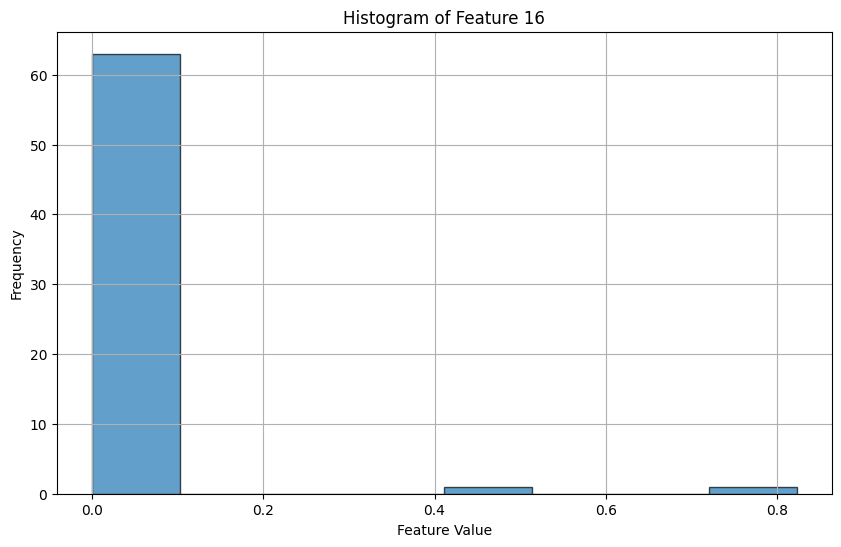

In [29]:
# Calculate histogram data
hist, bins = np.histogram(selected_feature, bins='auto')  # You can specify the number of bins or use 'auto'

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(selected_feature, bins=bins, edgecolor='black', alpha=0.7)
plt.title('Histogram of Feature {}'.format(feature_index))
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [30]:
# Calculate the mean and variance of the selected feature
mean = np.mean(selected_feature)
variance = np.var(selected_feature)

print(f"Mean of Feature {feature_index}: {mean:.2f}")
print(f"Variance of Feature {feature_index}: {variance:.2f}")


Mean of Feature 16: 0.02
Variance of Feature 16: 0.01


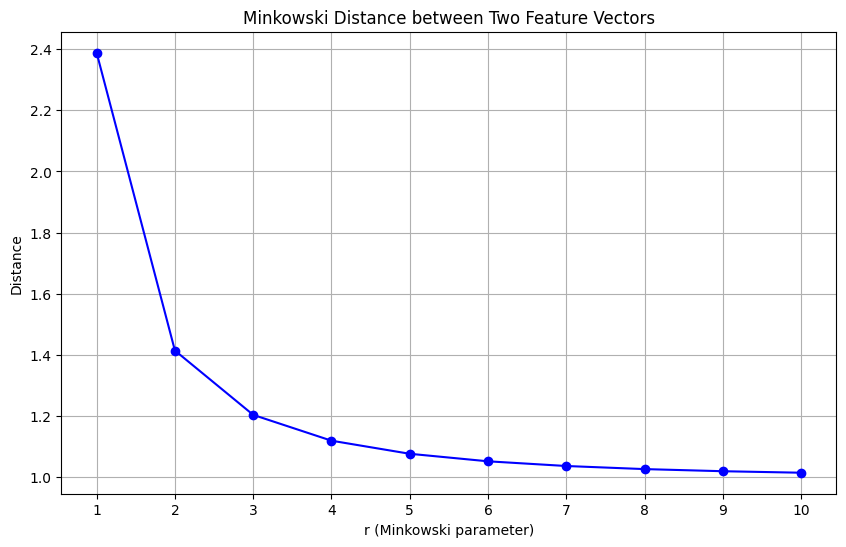

In [31]:
feature_vector_1 = data_array[0]
feature_vector_2 = data_array[1]

# Function to calculate Minkowski distance
def minkowski_distance(x, y, r):
    return np.sum(np.abs(x - y) ** r) ** (1 / r)

# Compute distances for r from 1 to 10
r_values = np.arange(1, 11)
distances = [minkowski_distance(feature_vector_1, feature_vector_2, r) for r in r_values]

# Plot the distances
plt.figure(figsize=(10, 6))
plt.plot(r_values, distances, marker='o', linestyle='-', color='b')
plt.title('Minkowski Distance between Two Feature Vectors')
plt.xlabel('r (Minkowski parameter)')
plt.ylabel('Distance')
plt.grid(True)
plt.xticks(r_values)
plt.show()

In [50]:
# Sample data: assuming you have a feature matrix `data_array` and labels `labels`
# Filter to keep only two classes for this example
selected_classes = ['Statement', 'Question']
filtered_indices = [i for i, label in enumerate(labels) if label in selected_classes]

X_filtered = data_array[filtered_indices]
y_filtered = [labels[i] for i in filtered_indices]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

# Check the shapes of the resulting datasets
print(f"Training feature set shape: {X_train.shape}")
print(f"Test feature set shape: {X_test.shape}")
print(f"Training labels shape: {len(y_train)}")
print(f"Test labels shape: {len(y_test)}")

Training feature set shape: (33, 122)
Test feature set shape: (15, 122)
Training labels shape: 33
Test labels shape: 15


In [53]:
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier using the training set
neigh.fit(X_train, y_train)

# Optionally, you can check the accuracy on the training set (optional)
train_accuracy = neigh.score(X_train, y_train)
print(f"Training accuracy: {train_accuracy:.2f}")

Training accuracy: 0.91


In [54]:
# Assuming the model has already been trained
# Predict classes for the entire test set
predictions = neigh.predict(X_test)

# Print the first few predictions to see how they look
print("Predictions for the test set:", predictions[:10])

# Classify a specific test vector (e.g., the first test vector in the test set)
test_vect = X_test[0]  # You can choose any vector from X_test
predicted_class = neigh.predict([test_vect])

print(f"Class for the test vector: {predicted_class[0]}")

Predictions for the test set: ['Statement' 'Question' 'Statement' 'Statement' 'Statement' 'Statement'
 'Statement' 'Question' 'Statement' 'Question']
Class for the test vector: Statement


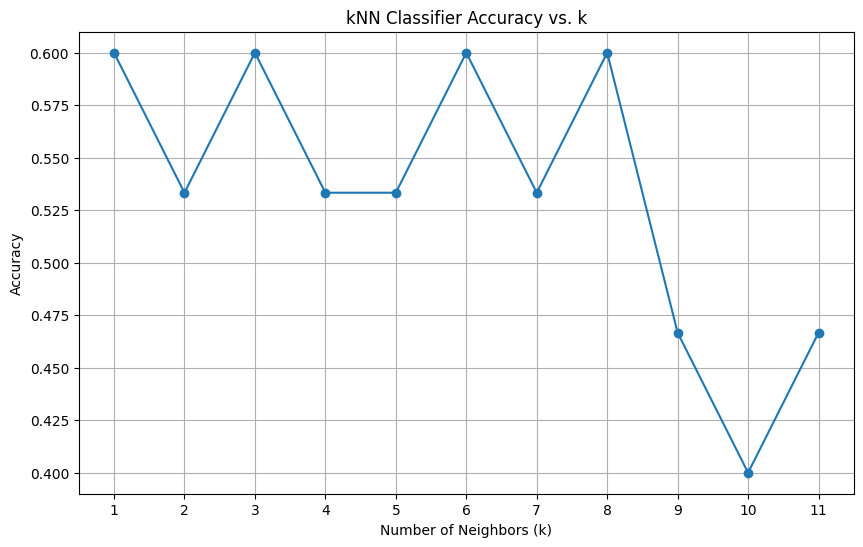

In [58]:
# Initialize lists to store results
k_values = range(1, 12)  # k from 1 to 11
accuracies = []

# Train and evaluate kNN classifiers for each k
for k in k_values:
    # Initialize the kNN classifier with the current k
    model = KNeighborsClassifier(n_neighbors=k)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    predictions = model.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('kNN Classifier Accuracy vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [59]:
def evaluate_model(y_true, y_pred, dataset_name):
    print(f"Confusion Matrix for {dataset_name} Data:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")

# Predict on training data
train_predictions = neigh.predict(X_train)

# Predict on test data
test_predictions = neigh.predict(X_test)

# Evaluate model performance
evaluate_model(y_train, train_predictions, "Training")
evaluate_model(y_test, test_predictions, "Test")

Confusion Matrix for Training Data:
[[14  1]
 [ 2 16]]

Classification Report:
              precision    recall  f1-score   support

    Question       0.88      0.93      0.90        15
   Statement       0.94      0.89      0.91        18

    accuracy                           0.91        33
   macro avg       0.91      0.91      0.91        33
weighted avg       0.91      0.91      0.91        33

Accuracy: 0.91
Confusion Matrix for Test Data:
[[1 3]
 [3 8]]

Classification Report:
              precision    recall  f1-score   support

    Question       0.25      0.25      0.25         4
   Statement       0.73      0.73      0.73        11

    accuracy                           0.60        15
   macro avg       0.49      0.49      0.49        15
weighted avg       0.60      0.60      0.60        15

Accuracy: 0.60
